# Eigen Value and Eigen Vectors

## Introduction

- Every vector (list of numbers) has a direction when it is plotted on a XY chart. 

- Consider A to be any square matrix. Now, almost all vectors will change direction, when they are multiplied by A. Certain exceptional vectors x are in the same direction as Ax, i.e. the direction of x and Ax will be the same. Those are the “eigenvectors”. Multiply an eigenvector by A, and the vector Ax is a number ($\lambda$) times the original x. The number ($\lambda$) is called the "eigenvalue".

![](./images/eigen1.png)

- An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.

- Eigen value— The scalar that is used to transform an Eigenvector.

- The eigenvalue tells whether the special vector x is stretched or shrunk or reversed or left unchanged—when it is multiplied by A. 

`A * eigen_vector = eigen_value * eigen_vector` 

**The above equation states that we need to multiply a scalar lambda (eigen_value) to the vector x (eigen_vector) such that it is equal to the linear transformation of matrix A once it is scaled by vector x.**

**if a square matrix has a size n (nxn) then we will get n eigenvalues and as a result, n eigenvectors will be computed to represent the matrix.**

## Finding eigenvectors

In [1]:
import numpy as np

In [2]:
arr = np.arange(0,9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
eigen_values, eigen_vectors = np.linalg.eig(arr)

In [4]:
print(eigen_values.shape)
eigen_values

(3,)


array([ 1.33484692e+01, -1.34846923e+00, -2.48477279e-16])

In [5]:
print(eigen_vectors.shape)
eigen_vectors

(3, 3)


array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])

In [6]:
vector = eigen_vectors[:,0]
vector

array([0.16476382, 0.50577448, 0.84678513])

In [7]:
value = eigen_values[0]
value

13.34846922834954

ideally: `A * eigen_vector - eigen_value * eigen_vector = 0` 

In [8]:
np.sum(np.matmul(arr,vector) - value*vector)

-6.217248937900877e-15

# Basics

## Variance

- Variance – measure of the deviation from the mean for points in one dimension, e.g., heights

## Covariance

- Covariance – a measure of how much each of the dimensions varies from the mean with respect to each other.

- Covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions, e.g., number of hours studied and grade obtained.

Exact value is not as important as its sign.

- A positive value of covariance indicates that both dimensions increase or decrease together, e.g., as the
number of hours studied increases, the grades in that subject also increase.

- A negative value indicates while one increases the other decreases, or vice-versa, e.g., active social life vs. performance in ECE Dept.

- If covariance is zero: the two dimensions are independent of each other, e.g., heights of students vs. grades obtained in a subject.

## Covariance Matrix

![](./images/cov.png)

# PCA

## Introduction

- Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. 

- Through it, we can directly decrease the number of feature variables, thereby narrowing down the important features and saving on computations. From a high-level view PCA has three main steps:

## PCA Steps

STEP 1: Subtract the mean from each of the dimensions.
 
STEP 2: Calculate the covariance matrix

STEP 3: Calculate the eigen vectors V and eigen values D of the covariance matrix

STEP 4: Reduce dimensionality and form feature vector: Use the eigen values and vectors to select only the most important feature vectors and then transform your data onto those vectors for reduced dimensionality!

### Finally:

- n dimensions in your data
- calculate n eigenvectors and eigenvalues
- choose only the first k eigenvectors
- final data set has only k dimensions.

## PCA for feature selection

- In an ideal world, if in a given feature vector, all features were statistically independent, one could simply eliminate the least discriminative features from the vector. The least discriminative features can be found by various greedy feature selection approaches. 

- However, in practice, features are correlated. Many features depend on each other or on an underlying unknown variable. A single feature could therefore represent a combination of multiple types of information by a single value. 

- Before eliminating features for dimensionality reduction, we would like to transform the complete feature space such that the underlying uncorrelated components are obtained.

- The feature space, can be decorrelated by selecting the eigenvectors of the covariance matrix as the new reference axes. We can thus obtain the uncorrelated features.

- After this dimensionality reduction can be performed. 

## Issues:

PCA simply assumes that the most interesting feature is the one with the largest variance or spread. This assumption is based on an information theoretic point of view, since the dimension with the largest variance corresponds to the dimension with the largest entropy and thus encodes the most information. The smallest eigenvectors will often simply represent noise components, whereas the largest eigenvectors often correspond to the principal components that define the data.

![](./images/pca_issue.png)

# Exercise

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
breast = load_breast_cancer()

In [11]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [12]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [13]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))

In [14]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [15]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

If you note in the features array, the label field is missing. Hence, you will have to manually add it to the features array since you will be equating this array with the column names of your breast_dataset dataframe.

In [17]:
features_labels = np.append(features,'label')

Now we can embed the column names to the breast_dataset dataframe.

In [18]:
breast_dataset.columns = features_labels

In [19]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [20]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [21]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [22]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [23]:
x.shape

(569, 30)

ideally the normalized data should have a mean of zero and a standard deviation of one.

In [24]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [25]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [26]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [27]:
principalComponents_breast.shape

(569, 2)

In [28]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [30]:
print('Explained variation per \
principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

Let's plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

<Figure size 432x288 with 0 Axes>

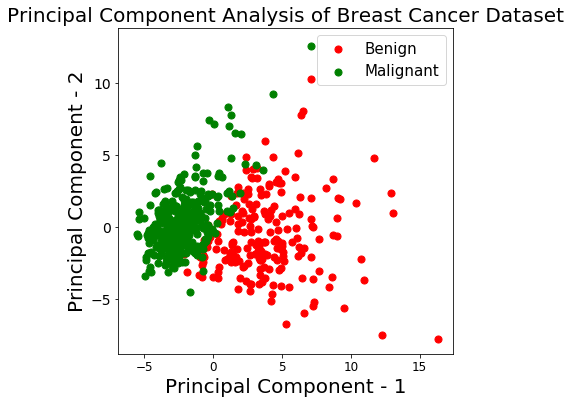

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(6,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",
          fontsize=20)

targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

In PCA we can also pass how much variance you want PCA to capture. Let's pass 0.9 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the number of components required to capture 90% variance will be used.

Note that earlier you passed n_components as a parameter and you could then find out how much variance was captured by those two components. But here we explicitly mention how much variance we would like PCA to capture and hence, the n_components will vary based on the variance parameter.

If you do not pass any variance, then the number of components will be equal to the original dimension of the data.

In [37]:
pca_breast = PCA(0.99)
principalComponents_breast = pca_breast.fit_transform(x)

In [38]:
principalComponents_breast.shape

(569, 17)

# References

https://www.visiondummy.com/2014/05/feature-extraction-using-pca/